<a href="https://colab.research.google.com/github/kalaiselvan-t/Deep-Learning/blob/master/CNN%20Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Binary Classification: Cats vs Dogs Dataset

In [ ]:
'''
Download the dataset
# of images - 2000 (subset of what available in kaggle)
'''
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-03-14 19:34:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 142.251.10.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M  20.9MB/s    in 3.8s    

2023-03-14 19:34:58 (17.2 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [ ]:
'''
Extract the data
'''
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./cats-or-dogs')
zip_ref.close()

In [ ]:
'''
List contents inside the directory

Ignore vectorize.py script
'''
import os

base_dir = './cats-or-dogs/cats_and_dogs_filtered'

print('Contents of base directory')
print(os.listdir(base_dir))

print('\nContents of the training directory')
print(os.listdir(f'{base_dir}/train'))

print('\nContents of the validation directory')
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory
['validation', 'vectorize.py', 'train']

Contents of the training directory
['dogs', 'cats']

Contents of the validation directory
['dogs', 'cats']


In [ ]:
'''
Assign each of these directories to a variable to use later
'''
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
'''
Look at file names inside the train and validation directories
'''
train_cats_names = os.listdir(train_cats_dir)
train_dogs_names = os.listdir(train_dogs_dir)

print(train_cats_names[:10])
print(train_dogs_names[:10])

['cat.553.jpg', 'cat.324.jpg', 'cat.761.jpg', 'cat.23.jpg', 'cat.129.jpg', 'cat.896.jpg', 'cat.128.jpg', 'cat.1.jpg', 'cat.452.jpg', 'cat.35.jpg']
['dog.76.jpg', 'dog.914.jpg', 'dog.857.jpg', 'dog.723.jpg', 'dog.826.jpg', 'dog.693.jpg', 'dog.263.jpg', 'dog.747.jpg', 'dog.42.jpg', 'dog.58.jpg']


In [ ]:
'''
Total number of images in the train and validation directories
'''
print(f'Total # images on train cats dir: {len(os.listdir(train_cats_dir))}')
print(f'Total # images on train dogs dir: {len(os.listdir(train_dogs_dir))}')
print(f'Total # images on validation cats dir: {len(os.listdir(validation_cats_dir))}')
print(f'Total # images on validation dogs dir: {len(os.listdir(validation_dogs_dir))}')

Total # images on train cats dir: 1000
Total # images on train dogs dir: 1000
Total # images on validation cats dir: 500
Total # images on validation dogs dir: 500


In [ ]:
'''
Look at the pictures in the dataset
'''
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0


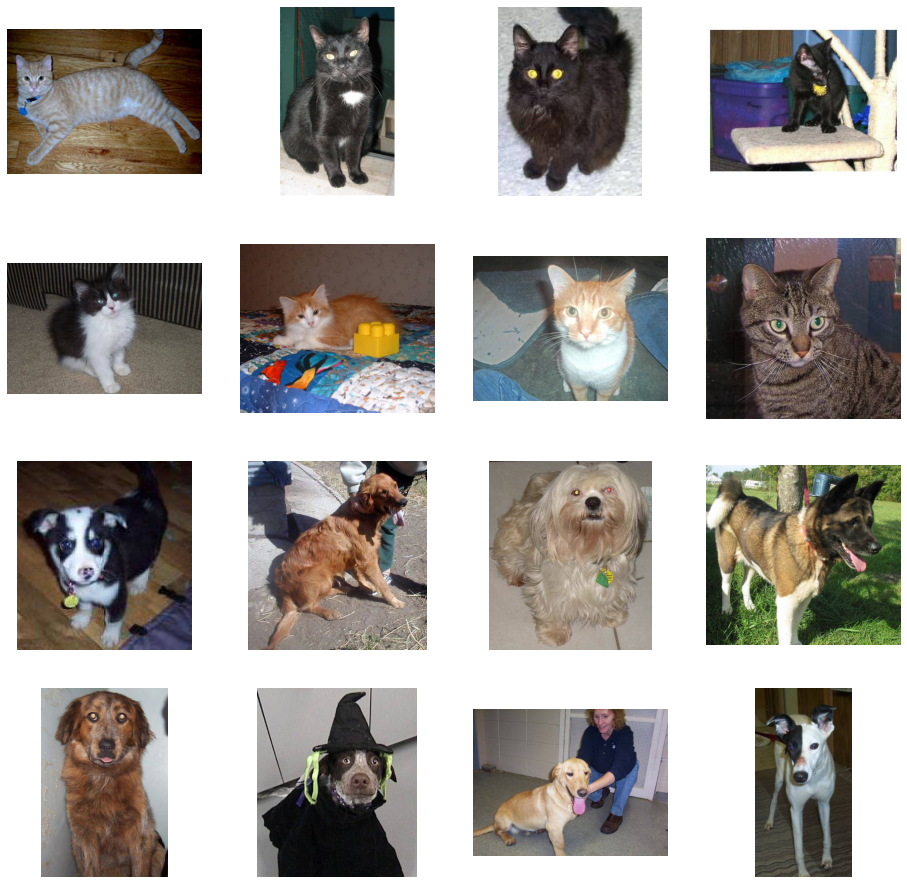

In [ ]:
'''
Display a set of 8 cats and 8 dogs. Rerun the cell to display next batch

All images are of different size
'''
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pic = [os.path.join(train_cats_dir, fname) 
                for fname in train_cats_names[pic_index-8:pic_index]
                ]
next_dog_pic = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_names[pic_index-8: pic_index]]

for i, img_path in enumerate(next_cat_pic + next_dog_pic):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
'''
Data Preprocessing
'''

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
validation_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    target_size=(150,150),
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    target_size=(150,150),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
'''
Building the model
'''
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.optimizers import RMSprop

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
'''
Training
'''

history = model.fit(
    train_generator,
    epochs=15,
    validation_data = validation_generator,
    verbose=2
    )

Epoch 1/15
100/100 - 10s - loss: 0.8046 - accuracy: 0.5180 - val_loss: 0.6893 - val_accuracy: 0.6440 - 10s/epoch - 104ms/step
Epoch 2/15
100/100 - 9s - loss: 0.7150 - accuracy: 0.5605 - val_loss: 0.6404 - val_accuracy: 0.6350 - 9s/epoch - 87ms/step
Epoch 3/15
100/100 - 9s - loss: 0.6415 - accuracy: 0.6385 - val_loss: 0.6085 - val_accuracy: 0.6530 - 9s/epoch - 94ms/step
Epoch 4/15
100/100 - 9s - loss: 0.6111 - accuracy: 0.6725 - val_loss: 0.5921 - val_accuracy: 0.7030 - 9s/epoch - 95ms/step
Epoch 5/15
100/100 - 9s - loss: 0.5565 - accuracy: 0.7180 - val_loss: 0.5534 - val_accuracy: 0.7120 - 9s/epoch - 94ms/step
Epoch 6/15
100/100 - 9s - loss: 0.5024 - accuracy: 0.7570 - val_loss: 0.5823 - val_accuracy: 0.7090 - 9s/epoch - 86ms/step
Epoch 7/15
100/100 - 9s - loss: 0.4611 - accuracy: 0.7980 - val_loss: 0.5602 - val_accuracy: 0.7100 - 9s/epoch - 93ms/step
Epoch 8/15
100/100 - 9s - loss: 0.4017 - accuracy: 0.8205 - val_loss: 0.8522 - val_accuracy: 0.6830 - 9s/epoch - 93ms/step
Epoch 9/15
10

In [ ]:
'''
Test the model
'''
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

1/1 [==============================] - 0s 236ms/step


<ipython-input-13-7885b6f30329>:51: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


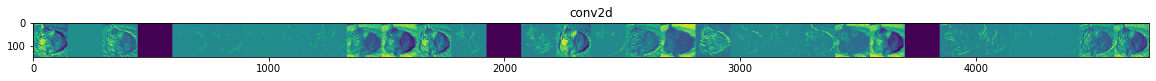

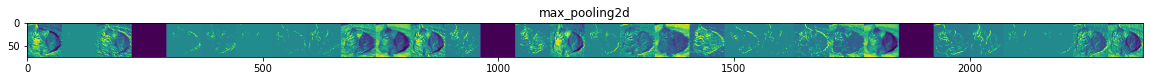

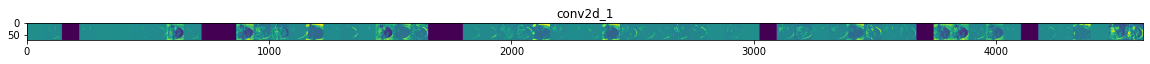

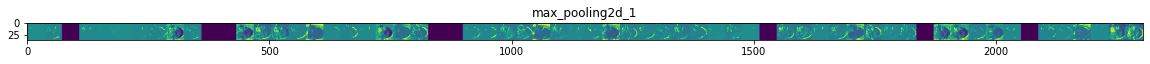

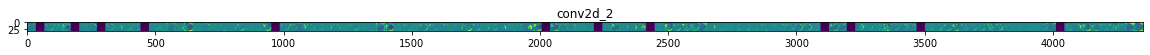

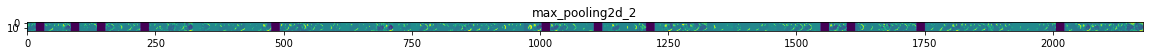

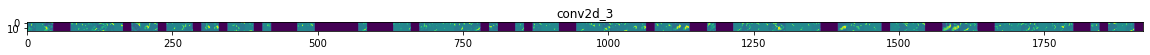

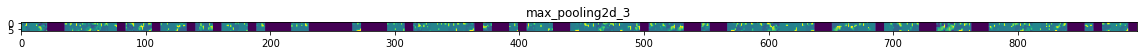

In [ ]:
'''
visulaizing intermediate representations
'''
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_names]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_names]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

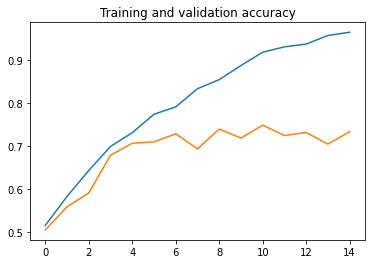

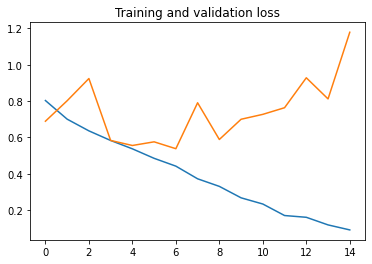

In [ ]:
'''
Evaluating the model
'''
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

#### Image Augmentation : Cats vs Dogs Dataset

Image augmentation is done to mitigate the problem of overfitting because of small dataset

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-03-14 19:18:52--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  20.7MB/s    in 3.8s    

2023-03-14 19:18:57 (17.1 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

import os

base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cats_names = os.listdir(train_cats_dir)
train_dogs_names = os.listdir(train_dogs_dir)
validation_cats_names = os.listdir(validation_cats_dir)
validation_dogs_names = os.listdir(validation_dogs_dir)

print(f'Total # of training cat images: {len(os.listdir(train_cats_dir))}')
print(f'Total # of training dog images: {len(os.listdir(train_dogs_dir))}')
print(f'Total # of validation cat images: {len(os.listdir(validation_cats_dir))}')
print(f'Total # of validation dog images: {len(os.listdir(validation_dogs_dir))}')

Total # of training cat images: 1000
Total # of training dog images: 1000
Total # of validation cat images: 500
Total # of validation dog images: 500


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.optimizers import RMSprop

def create_model():

  model = models.Sequential()

  model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Conv2D(64, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Conv2D(128, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.summary()

  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  return model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

model = create_model()
EPOCHS = 20

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs = EPOCHS,
    verbose=2,
    validation_data = validation_generator,
    validation_steps = 50
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and Validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label="Training loss")
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

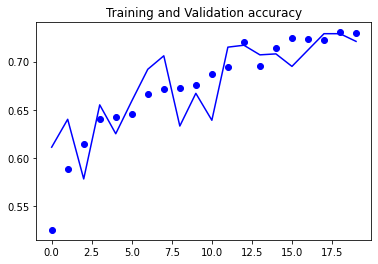

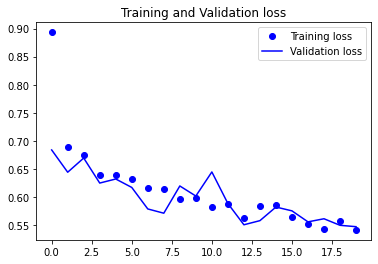

In [ ]:
plot_loss_acc(history)

#### Image Augmentation: Horse vs Humans Dataset

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-03-15 14:43:20--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  34.4MB/s    in 5.2s    

2023-03-15 14:43:26 (27.2 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-03-15 14:43:29--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  12.3MB/s    in 0.9s    

2023-03-15 14:43:30 (12.3 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import zipfile
import os

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

train_dir = './horse-or-human'
validation_dir = './validation-horse-or-human'
train_horses_dir = os.path.join(train_dir,'horses')
train_humans_dir = os.path.join(train_dir, 'humans')
validation_horses_dir = os.path.join(validation_dir,'horses')
validation_humans_dir = os.path.join(validation_dir, 'humans')

train_horses_names = os.listdir(train_horses_dir)
train_humans_names = os.listdir(train_humans_dir)
validation_horses_names = os.listdir(validation_horses_dir)
validation_humans_names = os.listdir(validation_humans_dir)

print(f'Total # train horses images: {len(os.listdir(train_horses_dir))}')
print(f'Total # train humans images: {len(os.listdir(train_humans_dir))}')
print(f'Total # validation horses images: {len(os.listdir(validation_horses_dir))}')
print(f'Total # validation humans images: {len(os.listdir(validation_humans_dir))}')

Total # train horses images: 500
Total # train humans images: 527
Total # validation horses images: 128
Total # validation humans images: 128


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.optimizers import RMSprop

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 32,
    epochs = 20,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8)

Epoch 1/20
32/32 [==============================] - 21s 407ms/step - loss: 1.2873 - accuracy: 0.5779 - val_loss: 0.8010 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 13s 399ms/step - loss: 0.5758 - accuracy: 0.7176 - val_loss: 0.9865 - val_accuracy: 0.5156
Epoch 3/20
32/32 [==============================] - 13s 392ms/step - loss: 0.4655 - accuracy: 0.7799 - val_loss: 1.4960 - val_accuracy: 0.5430
Epoch 4/20
32/32 [==============================] - 13s 397ms/step - loss: 0.4189 - accuracy: 0.8171 - val_loss: 1.7425 - val_accuracy: 0.5820
Epoch 5/20
32/32 [==============================] - 12s 386ms/step - loss: 0.3320 - accuracy: 0.8492 - val_loss: 2.4662 - val_accuracy: 0.5352
Epoch 6/20
32/32 [==============================] - 13s 392ms/step - loss: 0.4963 - accuracy: 0.8402 - val_loss: 1.3480 - val_accuracy: 0.6133
Epoch 7/20
32/32 [==============================] - 12s 392ms/step - loss: 0.3541 - accuracy: 0.8704 - val_loss: 1.4423 - val_accuracy: 0.5859

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and Validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'r', label="Training loss")
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

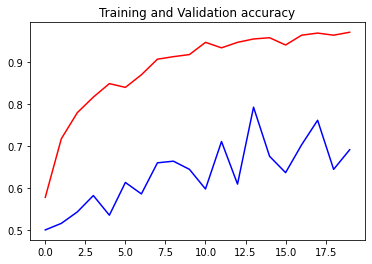

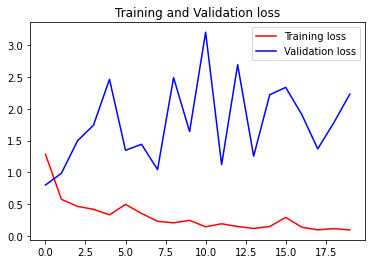

In [ ]:
plot_loss_acc(history)

#### Transfer Learning and Dropout Layer

**Transfer Learning**
- Get the convolutions of one model
- Attach some dense layers onto it
- Train the dense network
- Evaluate the results

**Pre-trained Model**
- InceptionV3
- Set the input shape : which the model will accept
- Pick and freeze convolution layers
- Add dense layers which you will train

Don't forget to get the weights of the pre-trained inception model. freeze the weights of these layers because they have been trained already

In [ ]:
'''
Setup the pretrained model
'''
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


--2023-03-15 17:00:25--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  19.8MB/s    in 5.5s    

2023-03-15 17:00:30 (15.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
import tensorflow
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3
from keras import layers

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(
    input_shape=(150,150,3),
    include_top = False,
    weights = None
)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('Last layer shape: ', last_layer.output_shape)
last_output = last_layer.output

Last layer shape:  (None, 7, 7, 768)


In [ ]:
'''
Add our dense layers to the already existing model
'''
from keras.optimizers import RMSprop
from keras import Model

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.summary()

model.compile(optimizer = RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
'''
Prepare the Dogs vs Cats dataset
'''
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-03-15 17:00:59--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M  19.3MB/s    in 4.5s    

2023-03-15 17:01:04 (14.5 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [ ]:
import zipfile
import os

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./cats-and-dogs-filtered')

zip_ref.close()

base_dir = './cats-and-dogs-filtered/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cats_names = os.listdir(train_cats_dir)
train_dogs_names = os.listdir(train_dogs_dir)

validation_cats_names = os.listdir(validation_cats_dir)
validation_dogs_names = os.listdir(validation_dogs_dir)

print(f'Total # train cats images: {len(os.listdir(train_cats_dir))}')
print(f'Total # train dogs images: {len(os.listdir(train_dogs_dir))}')
print(f'Total # validation cats images: {len(os.listdir(validation_cats_dir))}')
print(f'Total # validation dogs images: {len(os.listdir(validation_dogs_dir))}')

Total # train cats images: 1000
Total # train dogs images: 1000
Total # validation cats images: 500
Total # validation dogs images: 500


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
'''
Train the model
'''

history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

Epoch 1/20
100/100 - 39s - loss: 1.2307 - accuracy: 0.8385 - val_loss: 0.3115 - val_accuracy: 0.8960 - 39s/epoch - 395ms/step
Epoch 2/20
100/100 - 24s - loss: 0.3958 - accuracy: 0.8835 - val_loss: 0.1651 - val_accuracy: 0.9310 - 24s/epoch - 244ms/step
Epoch 3/20
100/100 - 25s - loss: 0.3499 - accuracy: 0.8945 - val_loss: 0.2108 - val_accuracy: 0.9290 - 25s/epoch - 246ms/step
Epoch 4/20
100/100 - 24s - loss: 0.2565 - accuracy: 0.9210 - val_loss: 0.2559 - val_accuracy: 0.9260 - 24s/epoch - 242ms/step
Epoch 5/20
100/100 - 26s - loss: 0.2749 - accuracy: 0.9155 - val_loss: 0.2020 - val_accuracy: 0.9300 - 26s/epoch - 256ms/step
Epoch 6/20
100/100 - 25s - loss: 0.2637 - accuracy: 0.9230 - val_loss: 0.3448 - val_accuracy: 0.8950 - 25s/epoch - 246ms/step
Epoch 7/20
100/100 - 24s - loss: 0.2455 - accuracy: 0.9225 - val_loss: 0.2469 - val_accuracy: 0.9200 - 24s/epoch - 244ms/step
Epoch 8/20
100/100 - 25s - loss: 0.2149 - accuracy: 0.9340 - val_loss: 0.2376 - val_accuracy: 0.9370 - 25s/epoch - 246

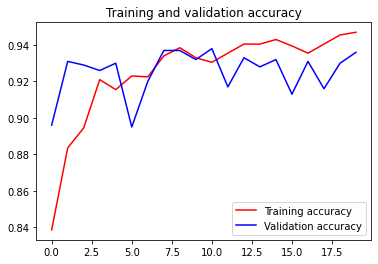

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()